# Principal Component Analysis

Principal component analysis is a versatile statistical method for reducing a cases-by-variables data table to its essential features, called principal components. Principal components are a few linear combinations of the original variables that maximally explain the variance of all the variables.

Principal component analysis (PCA) is a dimensionality reduction and machine learning method used to simplify a large data set into a smaller set while still maintaining significant patterns and trends. The idea of PCA is simple: **reduce the number of variables of a data set, while preserving as much information as possible.**

## Importing and loading data

In [1]:
# Import required libraries
import pandas as pd
import numpy as np

# Plotting graphs
import matplotlib.pyplot as plt
%matplotlib inline

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier

from sklearn.metrics import accuracy_score
from sklearn.decomposition import PCA

import warnings
warnings.filterwarnings('ignore')

In [6]:
from sklearn.datasets import fetch_openml

# Load the data
mnist = fetch_openml('mnist_784')

X = mnist['data']
y = mnist['target']

# check shape of data
print('Shape:', X.shape)

Shape: (70000, 784)


## Scale the data

In [8]:
# Standardise the data
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

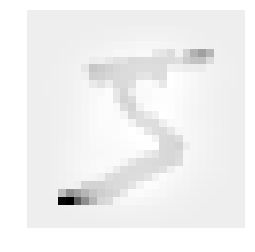

In [6]:
# Display the first image after standardisation
digit_scale = X_scaled[0]
digit_scale_image = digit_scale.reshape(28, 28)

plt.imshow(digit_scale_image, cmap=plt.cm.gray_r, interpolation = 'nearest')
plt.axis('off')

plt.show()

## Model building

### Creating the training and testing set

In [10]:
# Creating the training and testing set
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, random_state = 10, test_size = 0.25)

print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(52500, 784) (52500,)
(17500, 784) (17500,)


### Run the random forest model

In [11]:
# creating the random forest classification model
model = RandomForestClassifier(random_state = 1, max_depth = 3, n_estimators = 100)

# fit the classifier
model.fit(X_train, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

## Classification without PCA

In [14]:
# predicting for the original test set
pred_1 = model.predict(X_test)

# checking the training performance - Accuracy Score
print('Training accuracy:', round(accuracy_score(model.predict(X_train), y_train), 3))

# checking the testing performance - Accuracy Score
print('Testing accuracy:', round(accuracy_score(pred_1, y_test), 3))

Training accuracy: 0.754
Testing accuracy: 0.753


## Classification after PCA

In [15]:
# Fitting the PCA algorithm on our data to find the appropriate number of principal components to keep
pca = PCA().fit(X_train)

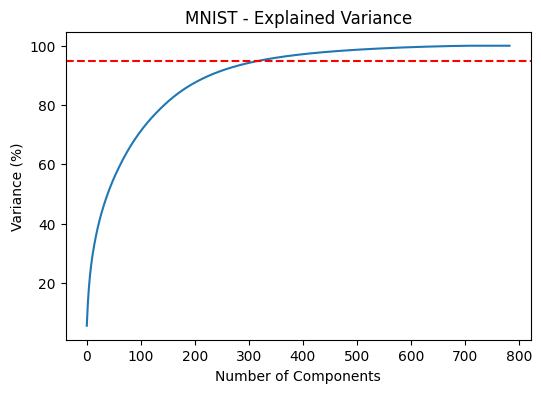

In [18]:
# Plotting the Cumulative Summation of the Explained Variance
plt.figure(figsize = (6,4))
plt.plot(np.cumsum(pca.explained_variance_ratio_) * 100)

plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('MNIST - Explained Variance')

# We want to preserve 95% of the variance so plot a horizontal line at 95% variance
plt.axhline(y = 95, color = 'r', linestyle = '--')
plt.show()

In [19]:
# Transforming the original train and validation set to 350 components

# fit on the training data
pca = PCA(320).fit(X_train)

# transform both training and validation data
X_train_transformed = pca.transform(X_train)
X_test_transformed = pca.transform(X_test)

# checking shape of data after PCA
print(X_train_transformed.shape, X_test_transformed.shape)

(52500, 320) (17500, 320)


### Fit on the same random forest model

In [20]:
# fitting the same random forest model on transformed data
model.fit(X_train_transformed, y_train)

RandomForestClassifier(max_depth=3, random_state=1)

In [22]:
# predicting for the original test set
pred_2 = model.predict(X_test_transformed)

# checking the training performance - Accuracy Score
print('Training accuracy:', round(accuracy_score(model.predict(X_train_transformed), y_train), 3))

# checking the testing performance - Accuracy Score
print('Testing accuracy:', round(accuracy_score(pred_2, y_test), 3))

Training accuracy: 0.793
Testing accuracy: 0.788
